In [336]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests, zipfile, io


%matplotlib notebook

In [379]:
# Make an empty dict to hold the data
data = {}

In [380]:
# Get Remote Data directly from published materials:

In [381]:
# CO2 Orbital
# http://dx.doi.org/10.1002/2014GL061957
URL = "https://tinyurl.com/y8mzo56k"
CO2_orbital = pd.read_excel(URL, sheetname="CO2 Composite", header=14)
CO2_orbital.set_index('Gasage (yr BP) ', inplace=True)
CO2_orbital.index.names = ['Age']
CO2_orbital.rename(columns={'CO2 (ppmv)': 'CO2'}, inplace=True)
data["CO2 Orbital"] = pd.DataFrame(CO2_orbital, columns=["CO2"])

In [382]:
# CO2 Deep Time
URL = "http://tinyurl.com/y7j3ttnp"
CO2_deep_time = pd.read_excel(URL, header=1, skip_footer=55)
CO2_deep_time.set_index("Age (Ma)", inplace=True)
CO2_deep_time.index.names = ["Age"]
CO2_deep_time.rename(columns={"CO2 (ppm)": "CO2"}, inplace=True)
data["CO2 Deep Time"] = pd.DataFrame(CO2_deep_time, columns=["CO2"]).apply(pd.to_numeric, errors='coerce')

In [402]:
# Temperature Orbital
URL = "https://doi.pangaea.de/10013/epic.46397.d001"
fname = 'Koehler-etal_2015/koehler2015cp__fig2c___time__delta_temp_g1__sigma1__delta_temp_g2__sigma2__delta_temp_g3__sigma3__withheader.dat'
r = requests.get(URL)
z = zipfile.ZipFile(io.BytesIO(r.content))
Temp_Orbital = pd.read_table(z.extract(fname), comment="#", header=None, usecols=[0, 1])
Temp_Orbital.columns = ["Age", "Temperature"]
Temp_Orbital["Age"] *= -1000.0
Temp_Orbital.set_index("Age", inplace=True)
data["Temperature Orbital"] = Temp_Orbital

In [384]:
# Temperature and Sea Level Deep Time
URL = "http://www.staff.science.uu.nl/~boer0160/Model_output/BdeBoer_etal_1Dmodel_output.txt"
Temp_Deep_Time = pd.read_csv(URL, comment="%", header=None, delim_whitespace=True)
Temp_Deep_Time.columns = ["Time (kyr BP)", "Sealevel", "Temperature", "T_dw (deg C)", "delta_w", "delta_T"]

polar_amplification_factor = 2.5
Temp_Deep_Time["Temperature"] /= polar_amplification_factor

Temp_Deep_Time["Time (kyr BP)"] /= -1000
Temp_Deep_Time.set_index("Time (kyr BP)", inplace=True)
Temp_Deep_Time.index.names = ["Age"]
Temp_Deep_Time

data["Temperature Deep Time"] = pd.DataFrame(Temp_Deep_Time, columns=["Temperature"])
data["Sealevel Deep Time"] = pd.DataFrame(Temp_Deep_Time, columns=["Sealevel"])

In [393]:
# Sealevel Orbital
URL="http://www.staff.science.uu.nl/~boer0160/Model_output/BdeBoer_etal_ANICE_5Myr_output.txt"
Sealevel_Orbital = pd.read_csv(URL, comment="%", header=None, delim_whitespace=True)
Sealevel_Orbital.columns = ["Time (ka)", "d18O-b", 
                            "d18O_sw", "d18O_temp",
                            "Sealevel", "dT-NH offset",
                            "EuIS-sc", "NaIS-sc",
                            "AIS-sc", "GrIS-sc",
                            "AnIS-V", "AnIS-ID"]
Sealevel_Orbital["Time (ka)"] *= -1000.0
Sealevel_Orbital.set_index("Time (ka)", inplace=True)
Sealevel_Orbital.index.names = ["Age"]
data["Sealevel Orbital"] = pd.DataFrame(Sealevel_Orbital, columns=["Sealevel"])

<IPython.core.display.Javascript object>


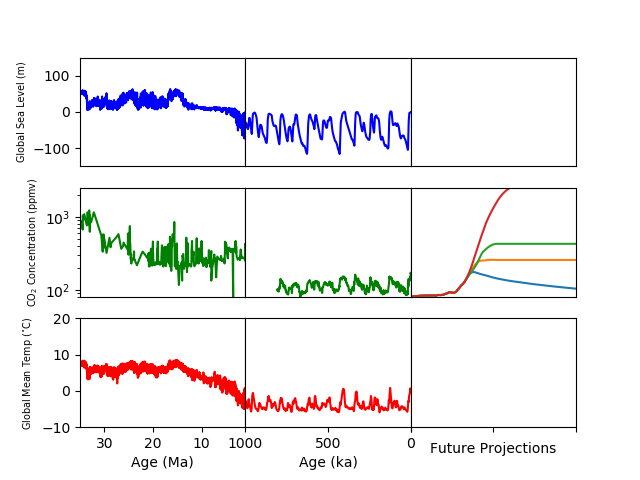

[None, None, None]

In [515]:
# Make the plot skeleton
f, axs = plt.subplots(3, 3)
[ax.set_yscale("log") for ax in axs[1, :]]

In [516]:
# Plot all the data
ax1 = data["Sealevel Deep Time"]["Sealevel"].plot(ax=axs[0,0], color="blue")
ax2 = data["Sealevel Orbital"]["Sealevel"].plot(ax=axs[0,1], color="blue")
ax3 = "Projections Sealevel"

ax4 = data["CO2 Deep Time"]["CO2"].plot(ax=axs[1,0], color="green")
#ax4.fill_between(data["CO2 Deep Time"].index, 
#                data["CO2 Deep Time"]["CO2Max"],
#                data["CO2 Deep Time"]["CO2Min"], color="green")
ax5 = data["CO2 Orbital"]["CO2"].plot(ax=axs[1,1], color="green")
ax6 = scenarios.plot(ax=axs[1,2], legend=False)


ax7 = data["Temperature Deep Time"]["Temperature"].plot(ax=axs[2, 0], color="red")
ax8 = data["Temperature Orbital"]["Temperature"].plot(ax=axs[2, 1], color="red")
ax9 = "Projections Temperature"

In [517]:
# Set common limits:
[ax.set_xlim(1, 35) for ax in axs[:, 0]]
[ax.set_xlim(0, 1000000) for ax in axs[:, 1]]

[ax.set_ylim(-150, 150) for ax in axs[0, :]]
[ax.set_ylim(0, 2500) for ax in axs[1, :]]

[ax.set_ylim(-10, 20) for ax in axs[2, :]];

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3245: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


In [518]:
# Make sure all the time axes go the other way around
[ax.invert_xaxis() for ax in axs.flatten()];
# But not the projection one!
axs[1, 2].invert_xaxis()

In [519]:
# Turn off spines in axes which don't need them:
for ax in axs[(0,1),:].flatten():
    ax.set_xlabel("")
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off') # labels along the bottom edge are off

for ax in axs[:, (1,2)].flatten():
    ax.set_ylabel("")
    ax.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        right='off',         # ticks along the top edge are off
        labelleft='off') # labels along the bottom edge are off

In [520]:
# Move the plots closer together:
f.subplots_adjust(wspace=0.0)

In [521]:
# Set xtick and xaxis labels
ax7.set_xticklabels(["0", "10", "20", "30"])
ax7.set_xlabel("Age (Ma)")
ax8.set_xticklabels(["0", "500", "1000"])
ax8.set_xlabel("Age (ka)")
axs[-1, -1].set_xticklabels(["", "", ""])
axs[-1, -1].set_xlabel("Future Projections");

In [522]:
# Set ylabels
ax1.set_ylabel("Global Sea Level (m)", size="x-small")
ax4.set_ylabel("CO$_{2}$ Concentration (ppmv)", size="x-small")
ax7.set_ylabel("Global Mean Temp ($^{\circ}$C)", size="x-small");

In [495]:
# Get the CO2 scenarios
HISTORIC_CO2 = pd.read_excel("http://www.pik-potsdam.de/~mmalte/rcps/data/20THCENTURY_MIDYEAR_CONCENTRATIONS.xls",
                             header=38,
                            sheetname="20THCENTURY_MIDYEAR_CONCENTRAT")
HISTORIC_CO2.set_index("v YEARS/GAS >", inplace=True)

In [483]:
# Historic Run
historic=pd.DataFrame(HISTORIC_CO2, columns=["CO2EQ"])

In [484]:
# RCP Scenarios
RCP3 = pd.read_excel("http://www.pik-potsdam.de/~mmalte/rcps/data/RCP3PD_MIDYEAR_CONCENTRATIONS.xls",
                    sheetname="RCP3PD_MIDYEAR_CONCENTRATIONS",
                    header=38)
RCP3.set_index("v YEARS/GAS >", inplace=True)

RCP4 = pd.read_excel("http://www.pik-potsdam.de/~mmalte/rcps/data/RCP45_MIDYEAR_CONCENTRATIONS.xls",
                    sheetname="RCP45_MIDYEAR_CONCENTRATIONS",
                    header=38)
RCP4.set_index("v YEARS/GAS >", inplace=True)



RCP6 = pd.read_excel("http://www.pik-potsdam.de/~mmalte/rcps/data/RCP6_MIDYEAR_CONCENTRATIONS.xls",
                    sheetname="RCP6_MIDYEAR_CONCENTRATIONS",
                    header=38)
RCP6.set_index("v YEARS/GAS >", inplace=True)

RCP8 = pd.read_excel("http://www.pik-potsdam.de/~mmalte/rcps/data/RCP85_MIDYEAR_CONCENTRATIONS.xls",
                    sheetname="RCP85_MIDYEAR_CONCENTRATIONS",
                    header=38)
RCP8.set_index("v YEARS/GAS >", inplace=True)


concentrations = pd.DataFrame

In [485]:
scenarios = pd.DataFrame([RCP3["CO2EQ"], RCP4["CO2EQ"], RCP6["CO2EQ"], RCP8["CO2EQ"]]).transpose()
scenarios.columns = ["RCP3", "RCP4.5", "RCP6", "RCP8.5"]
scenarios.index.names = ["Age"]

In [526]:
CO2_orbital["Age"] == 0

KeyError: 'Age'